# 探索泰坦尼克号数据集报告

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 一、数据导入

In [107]:
titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数据字典：

Survival：是否生还（0:否；1:是）

Pclass: 船票级别（1：上等；2：中等；3：下等）

Sex：乘客性别

Age：乘客年龄

Sibsp：兄弟姐妹数量

Parch：父母儿女数量

Ticket：船票编号

Fare： 票价

Cabin：船舱号

Embarked：登船港（C = Cherbourg, Q = Queenstown, S = Southampton）

[来源：kaggle](https://www.kaggle.com/c/titanic/data)

## 二、数据预处理

### 1. 去掉数据中不研究的数据列

In [108]:
# 只探索乘客社会经济地位、性别和年龄对生还率的影响，因此去掉数据中无关列

titanic_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)


In [110]:
# 查看数据信息

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB


### 2. 通过查看数据信息，发现Age列有数据缺失，在此以所有人的年龄平均值进行填充

In [114]:
# 以所有人的年龄平均值对年龄缺失的数据进行填充

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


In [115]:
# 检查Age列是否还有数据缺失

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB


Age列已经没有数据缺失

## 三、问题定义和数据探索

### 1. 计算泰坦尼克号失事后的乘客生还率

0    549
1    342
Name: Survived, dtype: int64


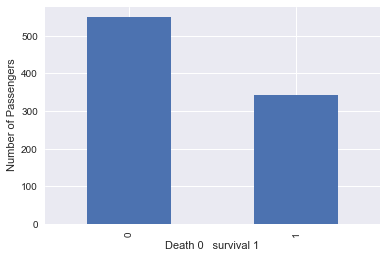

In [137]:
# 查看生还和死亡的数量分布

survived_count = titanic_df['Survived'].value_counts()
print survived_count
survived_count.plot(kind='bar')
plt.xlabel('Death 0   survival 1')
plt.ylabel(' Number of Passengers')

In [75]:
# 计算生还率

survive_rate = float(titanic_df['Survived'].value_counts()[1]) / titanic_df['Survived'].value_counts().sum() #生还率
print survive_rate

0.383838383838


生还率为38.38%

### 2. 持不同级别的船票对乘客能否生还有无影响？
船票的级别可以近似看做该乘客的社会经济地位，此问题即探索在船失事时，救援人员有没有对上等社会的人区别对待。

3    491
1    216
2    184
Name: Pclass, dtype: int64


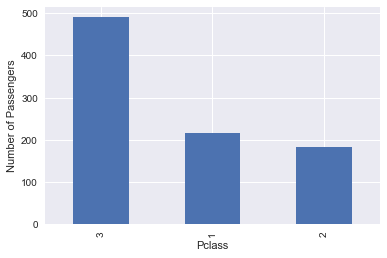

In [138]:
# 首先，看一下乘客社会经济地位的分布情况

pclass_count = titanic_df['Pclass'].value_counts()
print pclass_count
pclass_count.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')

可以看到，乘客中，持最低级船票的人的数量最多

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


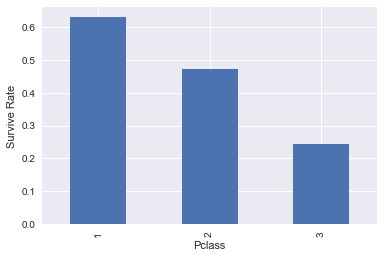

In [132]:
# 探索不同级别船票的乘客分别的生还情况

pclass_df = titanic_df.groupby('Pclass').mean() 
survived_rate = pclass_df['Survived']
survived_rate.plot(kind='bar')
print survived_rate
plt.ylabel('Survive Rate')

可以看到，乘客的生还率与乘客的船票级别正相关，且级别最高的船票乘客的生还率是级别最低船票乘客的2倍多

说明，在船失事后，救援人员对上等社会的人进行了特殊照顾。

### 3. 乘客的性别对乘客能否生还有无影响？
电影中的场景，妇女和小孩上了救生船，应该女性的生还率会比男性的高

male      577
female    314
Name: Sex, dtype: int64


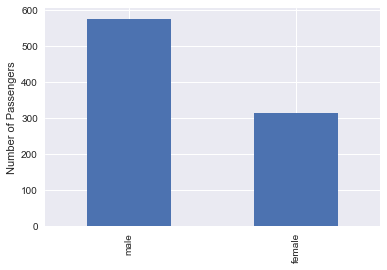

In [139]:
# 首先，看一下乘客的男女比例

sex_count = titanic_df['Sex'].value_counts()
print sex_count
sex_count.plot(kind='bar')
plt.ylabel('Number of Passengers')

可以看到，男性乘客要明显多于女性，说明当时的欧洲社会，男性地位还是比女性更高一些。

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


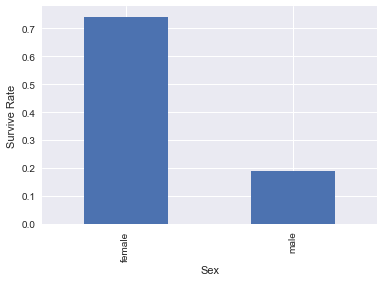

In [135]:
# 探索不同性别的乘客分别的生还情况

pclass_df = titanic_df.groupby('Sex').mean() 
survived_rate = pclass_df['Survived']
survived_rate.plot(kind='bar')
print survived_rate
plt.ylabel('Survive Rate')

可以看到，女性的生还率要远远高于男性，男性的生存能力本应高于女性，而事实上男性只有18.9%的生还率

说明，在泰坦尼克号失事后，男性乘客主动让出了救生工具。

### 4. 乘客的年龄对乘客能否生还有无影响？
电影中的场景，妇女和小孩上了救生船，应该年龄最小的乘客生还率最高

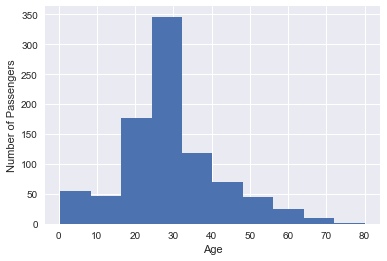

In [140]:
# 首先，看一下乘客的年龄分布

titanic_df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Number of Passengers')

Age_level
10 below    0.593750
80 above    0.200000
<=20        0.382609
<=30        0.334152
<=40        0.445161
<=50        0.383721
<=60        0.404762
<=70        0.235294
Name: Survived, dtype: float64


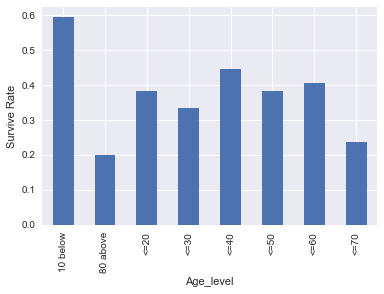

In [161]:
# 探索不同年龄的乘客的生还情况

# 查看生还和遇难乘客的平均年龄

titanic_df.groupby(['Survived'], as_index=False).mean()['Age']

# 探索乘客的生还情况随着年龄的变化

def age_level(age): #根据
    if age <= 10:
        return '10 below'
    elif age <= 20:
        return '<=20'
    elif age <= 30:
        return '<=30'
    elif age <= 40:
        return '<=40'
    elif age <= 50:
        return '<=50'
    elif age <= 60:
        return '<=60'
    elif age <= 70:
        return '<=70'
    else:
        return '80 above'
        
titanic_df['Age_level'] = titanic_df['Age'].apply(age_level)
age_df = titanic_df.groupby('Age_level').mean()
age_rate = age_df['Survived']
age_rate.plot(kind='bar')
print age_rate
plt.ylabel('Survive Rate')

- 生还乘客的平均年龄要小于遇难乘客
- 10岁以下的乘客生还率最高，符合电影中的场景

## 四、结论
1. 据样本数据推断，泰坦尼克号失事后的乘客生还率为38.38%；
2. 乘客的生还率与乘客的船票级别正相关。说明，在船失事后，救援人员对上等社会的人进行了特殊照顾；
3. 女性的生还率要远远高于男性。说明，在船失事后，男性乘客主动让出了救生工具；
4. 生还乘客的平均年龄要小于遇难乘客；
5. 10岁以下的乘客生还率最高。说明，在船失事后，大人主动让出了救生工具。

## 五、限制
1. 此次数据探索，只是探索的乘客船票级别、性别和年龄与乘客能否生还的相关性，而非因果关系；
2. 此次数据探索，支持基于2224个乘客中的891名乘客数据，可能对总体的描述会存在误差；
3. 此次数据探索基于的891名乘客，并不确定取样的合理性，可能存在误差；
4. 由于年龄数据存在缺失，可能会对结果造成影响。